<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Pablo Zambrano &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [9]:
url = 'https://raw.githubusercontent.com/pazambrano/Aprendizaje-Automatico-Inicial/main/Auto_Sales_Cleaned%20(1).csv'
data = pd.read_csv(url)
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
class_col = ['DEALSIZE']
data = data[['ORDERNUMBER', *numeric_cols, *class_col]]
display(data.head())
print(data.describe())
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:-1])

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MSRP,DEALSIZE
0,10107,30,95.70,2871.00,95,Small
1,10121,34,81.35,2765.90,95,Small
2,10134,41,94.74,3884.34,95,Medium
3,10145,45,83.26,3746.70,95,Medium
4,10168,36,96.66,3479.76,95,Medium


        ORDERNUMBER  QUANTITYORDERED    PRICEEACH         SALES         MSRP
count   2747.000000      2747.000000  2747.000000   2747.000000  2747.000000
mean   10259.761558        35.103021   101.098952   3553.047583   100.691664
std       91.877521         9.762135    42.042549   1838.953901    40.114802
min    10100.000000         6.000000    26.880000    482.130000    33.000000
25%    10181.000000        27.000000    68.745000   2204.350000    68.000000
50%    10264.000000        35.000000    95.550000   3184.800000    99.000000
75%    10334.500000        43.000000   127.100000   4503.095000   124.000000
max    10425.000000        97.000000   252.870000  14082.800000   214.000000



### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


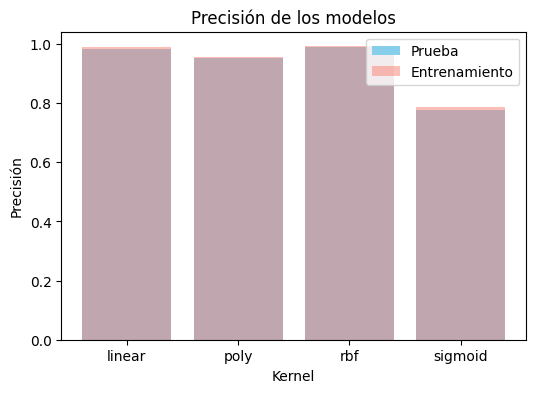

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, data['DEALSIZE'], test_size=0.2, random_state=42, stratify=data['DEALSIZE'])
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
precisions_test = []
precisions_train = []
for kernel in kernel_values:
    modelo = SVC(kernel=kernel)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))
plt.figure(figsize=(6, 4))
plt.bar(kernel_values, precisions_test, color='skyblue')
plt.bar(kernel_values, precisions_train, color='salmon', alpha=0.5)
plt.title('Precisión de los modelos')
plt.xlabel('Kernel')
plt.ylabel('Precisión')
plt.legend(['Prueba', 'Entrenamiento'])
plt.show()

El modelo SVM es robusto, destacando el kernel Linear con una precisión cercana al 100% en la paridad entre los resultados de entrenamiento y prueba confirma una generalización perfecta sin sobreajuste, observando que las categorías de ventas son lineales y fáciles de clasificar.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [11]:
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.98
Matriz de confusión:
[[ 29   1   0]
 [  1 265   4]
 [  0   3 247]]
Reporte de clasificación:
              precision    recall  f1-score   support

       Large       0.97      0.97      0.97        30
      Medium       0.99      0.98      0.98       270
       Small       0.98      0.99      0.99       250

    accuracy                           0.98       550
   macro avg       0.98      0.98      0.98       550
weighted avg       0.98      0.98      0.98       550



<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

In [14]:
from sklearn.neighbors import KNeighborsClassifier

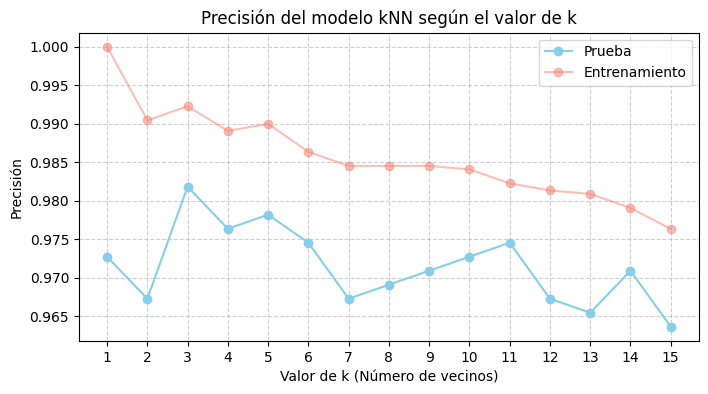

In [18]:
k_values = range(1, 16)
precisions_test = []
precisions_train = []
for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))
plt.figure(figsize=(8, 4))
plt.plot(k_values, precisions_test, marker='o', label='Prueba', color='skyblue')
plt.plot(k_values, precisions_train, marker='o', label='Entrenamiento', color='salmon', alpha=0.5)
plt.title('Precisión del modelo kNN según el valor de k')
plt.xlabel('Valor de k (Número de vecinos)')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [19]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo kNN:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo kNN: 0.98
Matriz de confusión:
[[ 27   3   0]
 [  0 265   5]
 [  0   4 246]]
Reporte de clasificación:
              precision    recall  f1-score   support

       Large       1.00      0.90      0.95        30
      Medium       0.97      0.98      0.98       270
       Small       0.98      0.98      0.98       250

    accuracy                           0.98       550
   macro avg       0.98      0.96      0.97       550
weighted avg       0.98      0.98      0.98       550



Aunquepara ambos modelos se puede observar que su presicion general es de 0.98% que es identicamente igual el SVM con kernel Linear es el modelo óptimo para este dataset ya que tiene una superioridad del SVM se manifiesta en su capacidad para identificar correctamente los tratos de tamaño
- SVM: Identificó correctamente a 29 de 30 tratos Large (97%).

- kNN: Solo identificó 27 de 30 (90%). Se le "escaparon" 3 tratos grandes clasificándolos como medianos.